In [51]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
# Initialize the variables
image_width = 128
image_length = 128
total_pixels = image_width*image_length

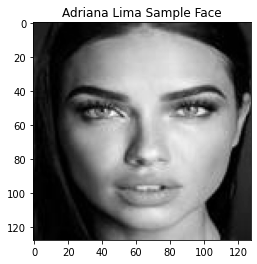

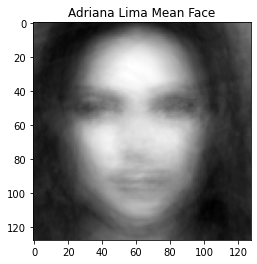

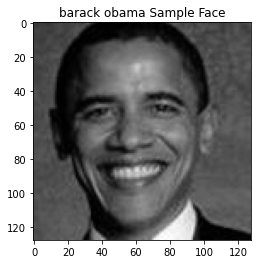

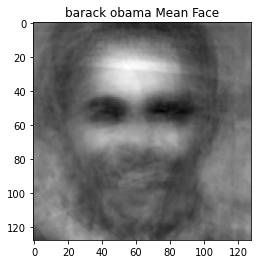

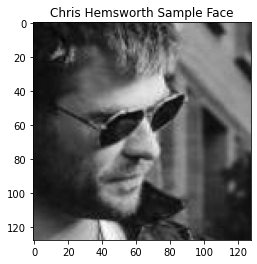

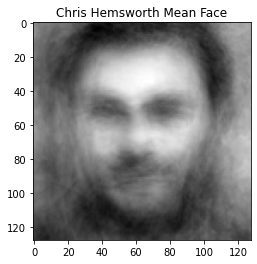

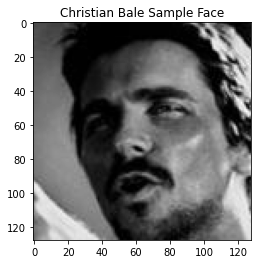

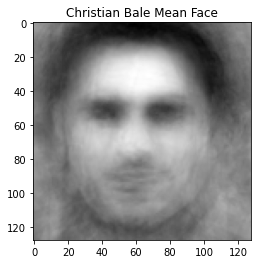

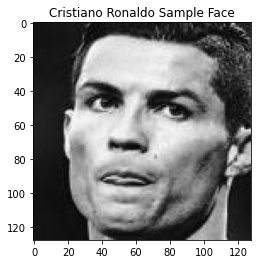

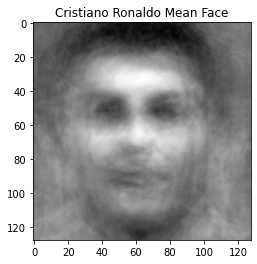

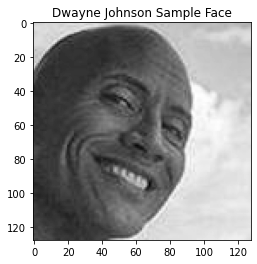

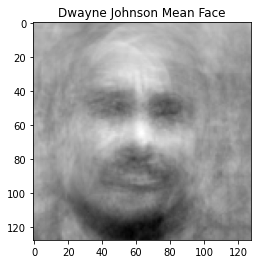

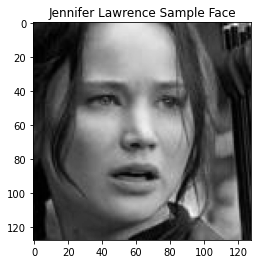

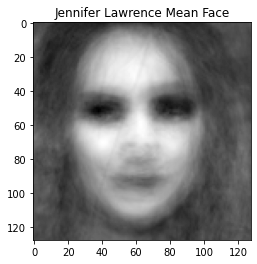

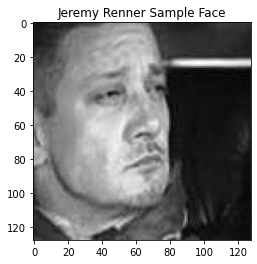

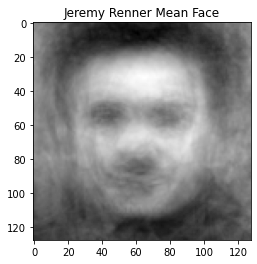

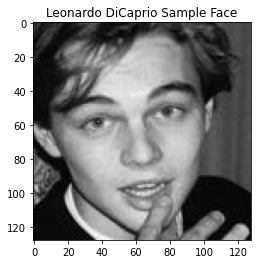

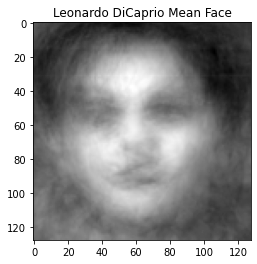

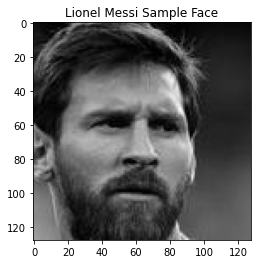

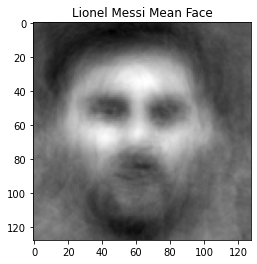

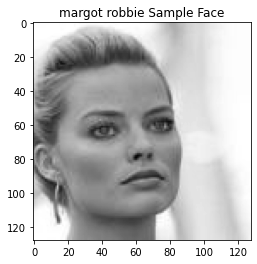

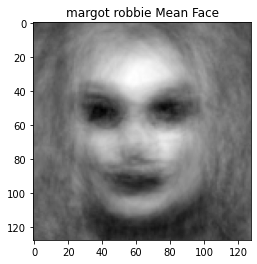

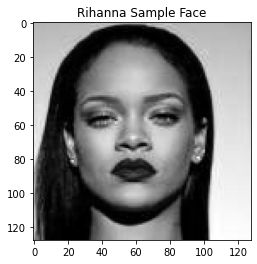

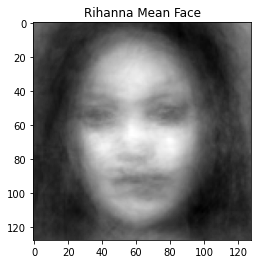

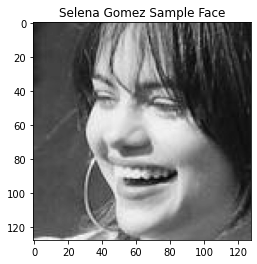

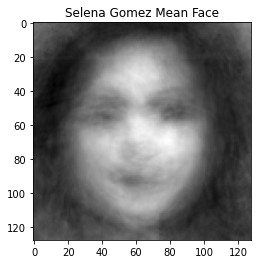

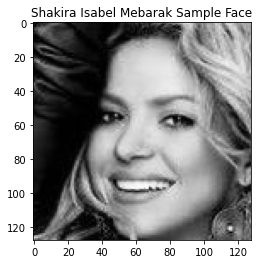

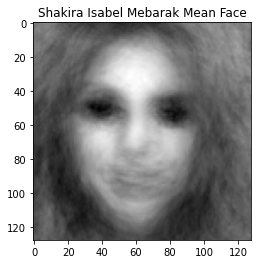

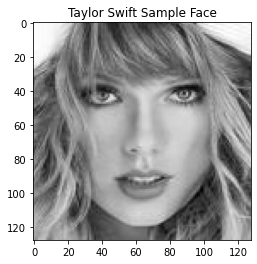

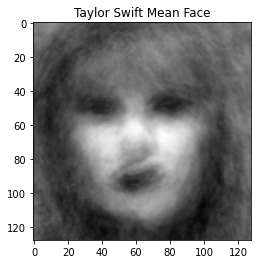

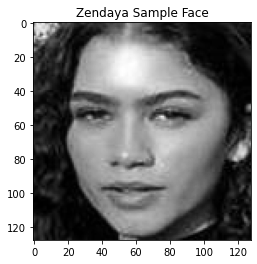

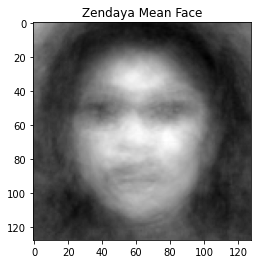

In [3]:
# Making and displaying the average faces for all 16 celebrity
os.chdir('Dataset')
celebrity_list = os.listdir()
count = 0
avg_face_vector = []
for i in celebrity_list:
    os.chdir(i)
    face_vector = []
    flag = 0
    pics_75 = 0
    for j in os.listdir():
        if pics_75 < 75:
            face_image = cv2.cvtColor(cv2.imread(j), cv2.COLOR_RGB2GRAY)
            face_image = cv2.resize(face_image, (image_width, image_length))
            face_image = face_image.reshape(total_pixels,)
            face_vector.append(face_image)
            if flag ==0:
                flag = 1
                plt.imshow(np.array(face_image.reshape(image_width,image_length)),cmap='gray')
                plt.title(i + ' Sample Face')
                plt.show()
        pics_75 += 1
    face_vector = np.asarray(face_vector)
    face_vector = face_vector.transpose()
    avg_face_vector.append(np.mean(face_vector,axis=1))
    

    
    plt.imshow(avg_face_vector[count].reshape(image_width,image_length),cmap='gray')
    plt.title(i + ' Mean Face')
    plt.show()
    avg_face_vector[count] = avg_face_vector[count].reshape(face_vector.shape[0], 1)
    count += 1
    
    os.chdir('..')
os.chdir('..')

In [80]:
# this function takes both file name and images as inputs and calculates the euclidian distance
def distance_test (file, is_image = 0):
    distance = []
    if is_image == 1:
        test_img = file
    else:
        test_img = cv2.imread(file)
    
    # converts the image into greyscale then it resizes and reshapes the image to a vector 
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)   
    test_img= cv2.resize(test_img, (image_width, image_length))
    test_img = test_img.reshape(total_pixels, 1)
    
    # calculates the distance from our given image and the 16 average images
    count = 0
    for i in avg_face_vector:
        dist = np.linalg.norm(i - test_img)
        distance.append([celebrity_list[count], dist])
        count += 1
    distance.sort(key = lambda x: x[1]) 
    
    return distance

In [64]:
# This is to test how good our euclidian distance method is at detecting whose faces it is
os.chdir("Dataset")
for name in celebrity_list:
    for number in range(75, 80, 1):
        dist = distance_test(name + "\\" + name + "_" + str(number) + ".jpg")
        print("Actual name: ", name)
        print("Prediction : ", dist[0][0])
        count = 0
        for k in range(len(dist)):
            if dist[k][0] == name:
                print("Rank of the actual name : ", count + 1)
                print("Percentage difference in distance of actual vs prediction : ", 100 * (dist[k][1] - dist[0][1])/dist[k][1])
            count += 1
        print("\n")
os.chdir("..")

Actual name:  Adriana Lima
Prediction :  Jennifer Lawrence
Rank of the actual name :  3
Percentage difference in distance of actual vs prediction :  5.61786408532017


Actual name:  Adriana Lima
Prediction :  Adriana Lima
Rank of the actual name :  1
Percentage difference in distance of actual vs prediction :  0.0


Actual name:  Adriana Lima
Prediction :  Adriana Lima
Rank of the actual name :  1
Percentage difference in distance of actual vs prediction :  0.0


Actual name:  Adriana Lima
Prediction :  Shakira Isabel Mebarak
Rank of the actual name :  15
Percentage difference in distance of actual vs prediction :  18.467410003887274


Actual name:  Adriana Lima
Prediction :  Rihanna
Rank of the actual name :  4
Percentage difference in distance of actual vs prediction :  9.926820308172358


Actual name:  barack obama
Prediction :  margot robbie
Rank of the actual name :  4
Percentage difference in distance of actual vs prediction :  10.329575170052177


Actual name:  barack obama
Pred

In [81]:
distance_test("Chris.jpeg")

[['Dwayne Johnson', 9227.591893754778],
 ['margot robbie', 9233.617508252717],
 ['Jeremy Renner', 9574.650461389063],
 ['Shakira Isabel Mebarak', 9602.162528865858],
 ['Chris Hemsworth', 9650.648902535],
 ['Taylor Swift', 9747.665838042118],
 ['barack obama', 9997.578594110786],
 ['Cristiano Ronaldo', 10250.785863415545],
 ['Jennifer Lawrence', 10269.22720100095],
 ['Christian Bale', 10856.520221712131],
 ['Lionel Messi', 10901.808163982096],
 ['Leonardo DiCaprio', 11023.742677693454],
 ['Zendaya', 11210.852593161682],
 ['Selena Gomez', 11511.113501748358],
 ['Adriana Lima', 12038.3014644721],
 ['Rihanna', 12140.37584946291]]

In [89]:
# Reading the image
img = cv2.imread(r'Collages/Collage_76.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image

faces_rect = haar_cascade.detectMultiScale(gray_img, 1.05, 7)
# Iterating through rectangles of detected faces
#for (x, y, w, h) in faces_rect:
    #cv2.rectangle(img, (x, y), (x+w, y+h), (127, 0, 255), 2)
cv2.imshow('Detected faces', img)
cv2.destroyAllWindows()

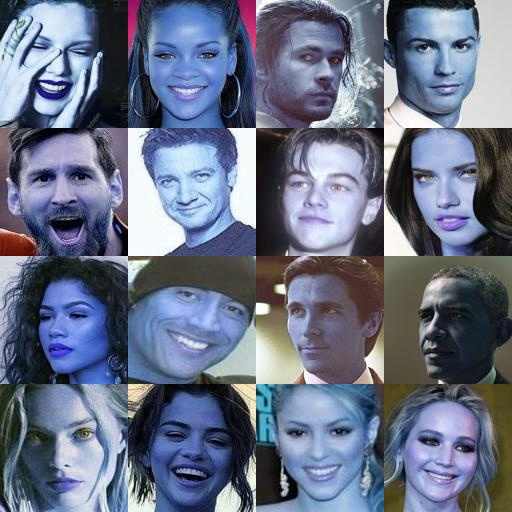

In [90]:
Image.fromarray(img)

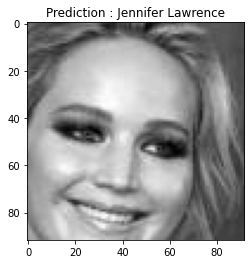

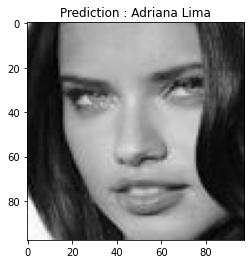

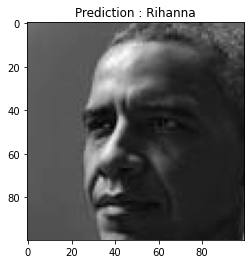

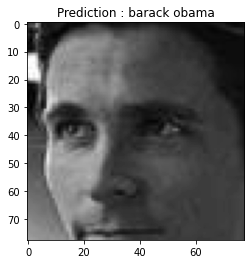

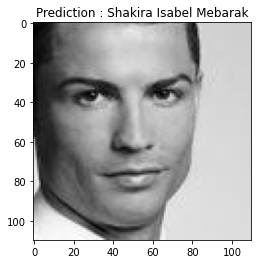

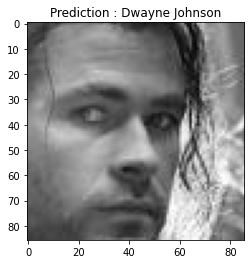

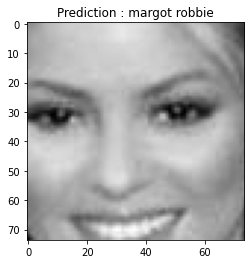

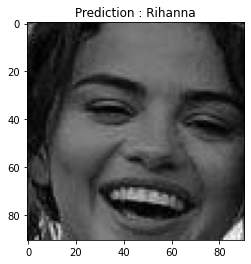

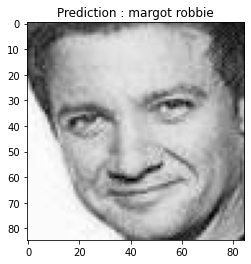

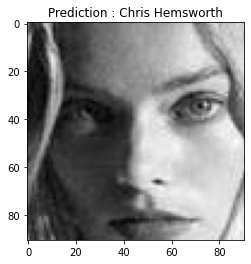

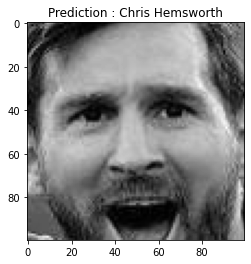

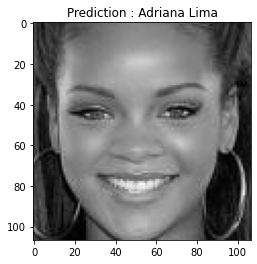

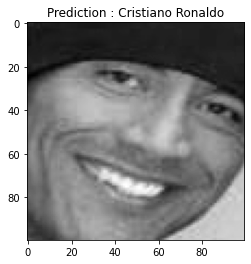

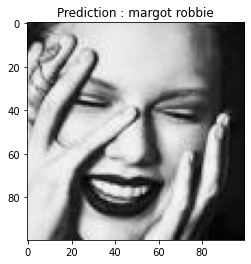

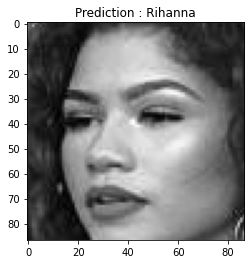

In [91]:
#Testing on the Collage
for i in range(len(faces_rect)):
    testing_img=img[faces_rect[i][0]:faces_rect[i][0]+faces_rect[i][2],faces_rect[i][1]:faces_rect[i][1]+faces_rect[i][3]]
    str = "Prediction : " + distance_test(testing_img, 1)[0][0]
    testing_img = cv2.cvtColor(testing_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(testing_img,cmap='gray')
    plt.title(str)
    plt.show()
    
    